# Introduction to DEA Surface Reflectance (Sentinel-2, Collection 3) <img align="right" src="../Supplementary_data/dea_logo.jpg">

* **[Sign up to the DEA Sandbox](https://app.sandbox.dea.ga.gov.au/)** to run this notebook interactively from a browser
* **Compatibility:** Notebook currently compatible with both the `NCI` and `DEA Sandbox` environments
* **Products used:** 
[ga_s2am_ard_3](https://explorer.sandbox.dea.ga.gov.au/ga_s2am_ard_3), 
[ga_s2bm_ard_3](https://explorer.sandbox.dea.ga.gov.au/ga_s2bm_ard_3)


## Background
The *European Space Agency* (*ESA*) has operated medium resolution satellites - Sentinel-2 series (Sentinel-2A and Sentinel-2B) since 2015. 
The spectral bands and spatial resolution of Sentinel-2 are similar to those of the Landsat series, but Sentinel-2 has a higher revisit frequency and spatial coverage. 
A combination of Sentinel-2 and Landsat data can provide good spatial and temporal coverage of the Earth's surface and provide useful information to monitor environmental resources over time, such as agricultural production and mining activities. 
However, the raw remotely sensed data received by these satellites in the solar spectral range do not directly characterise the underlying reflectance of surface objects. 
The data are modified by the atmosphere, variation of solar and sensor positions as well as surface anisotropic conditions. 
To make accurate comparisons of imagery acquired at different times, seasons and geographic locations, and detect the change of surface, it is necessary to remove/reduce these effects to ensure the data are consistent and can be compared over time.

### What the Sentinel-2 products offer
The products below take Sentinel-2A and Sentinel-2B imagery captured over the Australian continent and correct for inconsistencies across land and coastal fringes. 
The result is accurate and standardised surface reflectance data, which is instrumental in identifying and quantifying environmental change.

The imagery is captured using the Multispectral Instrument (MSI) sensor aboard Sentinel-2A and Sentinel-2B.

These products form a single, cohesive Analysis Ready Data (ARD) package, which allows the analysis of surface reflectance data as is, without the need to apply additional corrections.

Sentinel-2A and Sentinel-2B each contain two sub-products that provide corrections or attribution information:

- [DEA Surface Reflectance NBART (Sentinel-2A MSI)](https://docs.dea.ga.gov.au/data/product/dea-surface-reflectance-nbart-sentinel-2a-msi)
- [DEA Surface Reflectance OA (Sentinel-2A MSI)](https://docs.dea.ga.gov.au/data/product/dea-surface-reflectance-oa-sentinel-2a-msi)
- [DEA Surface Reflectance NBART (Sentinel-2B MSI)](https://docs.dea.ga.gov.au/data/product/dea-surface-reflectance-nbart-sentinel-2b-msi)
- [DEA Surface Reflectance OA (Sentinel-2B MSI)](https://docs.dea.ga.gov.au/data/product/dea-surface-reflectance-oa-sentinel-2b-msi)

The resolution is a 10/20/60 m grid based on the ESA Level 1C archive.

**This Collection 3 (C3) product** and has been created by reprocessing Collection 1 (C1) and making improvements to the processing pipeline and packaging.

**Packaging updates include:** 

- Open Data Cube (ODC) eo3 metadata.
- metadata includes STAC fields to enable users to filter by fields such as tile ID or cloud cover percentage in applications such as ODC. 
- additional STAC metadata file in JSON format.
- directory structure and file names that are consistent with GA’s Landsat C3 products.  

**Additional updates include:**

- upgrading the spectral response function to result in a more accurate product. These new versions include minor updates, slight changes of the central wavelengths for band B02 of S2A and S2B, and band B01 of S2B, along with slight changes of the Full Width Half Maximum (FWHM) for most of the bands.
- correction of solar constant errors in the conversion between reflectance and radiance as well as in the atmospheric correction.
- an additional cloud mask layer (s2cloudless)
- automatic Fmask cloud and shadow buffering turned off for consistency with Landsat Collection 3, and greater flexibility for cloud masking in areas affected by false positive clouds
- additional geometric quality assessment (GQA) metadata to enable Sentinel-2 images to be filtered by geometric accuracy
- removal of NBAR layers.
- reduced spatial resolution of observation attribute layers to 20 m resolution, with the contiguity layer being maintained at 10 m.  
- BRDF ancillary upgraded from MODIS BRDF C5 to MODIS BRDF C6.
- Upgrading from MODTRAN 5.2 to MODTRAN 6.

**The introduction of a maturity concept:**

The Collection 3 product is comprised of data produced to varying degrees of maturity. The maturity of a dataset is dictated by the quality of the ancillary information used to generate the product. The maturity levels are Near Real Time (NRT), Interim and Final. The maturity level is designated in the filename and in the metadata.

- Near Real Time (NRT) is a rapid ARD product produced < 48 hours after image capture. 
- Interim ARD – If there are extended delays (>18 days) in delivery of inputs to the ARD model, we fall back to interim production until the issue is resolved.  
- Final ARD - As the higher quality ancillary datasets become available, a “Final” version of the Sentinel 2 ARD data is produced, which replaces the NRT or interim product.  

### Applications

* The development of derivative products to monitor land, inland waterways and coastal features, such as:

    - urban growth
    - coastal habitats
    - mining activities
    - agricultural activity (e.g. pastoral, irrigated cropping, rain-fed cropping)
    - water extent


* The development of refined information products, such as:

    - areal units of detected surface water
    - areal units of deforestation
    - yield predictions of agricultural parcels


* Compliance surveys
* Emergency management

> **Note:** For more technical information about DEA Surface Reflectance, visit the official Geoscience Australia DEA Surface Reflectance product descriptions for [Sentinel-2A](https://docs.dea.ga.gov.au/data/product/dea-surface-reflectance-sentinel-2a-msi) and [Sentinel-2B](https://docs.dea.ga.gov.au/data/product/dea-surface-reflectance-sentinel-2b-msi).

## Description
This notebook will demonstrate how to load, plot and filter DEA Surface Reflectance data using the [Open Data Cube](https://opendatacube.readthedocs.io/en/latest/about-core-concepts/index.html) software. 
Topics covered include:

1. [Inspecting the products and measurements available in the datacube](#Available-products-and-measurements)
2. [Loading DEA Sentinel-2 Surface Reflectance for an example location (including filtering by dataset maturity)](#Loading-Sentinel-2-data)
3. [Plotting Sentinel-2 surface reflectance as RGB images](#Plotting-Sentinel-2-surface-reflectance)
4. [Loading cloud masked Sentinel-2A and 2B data with "load_ard"](#Loading-cloud-masked-Sentinel-2A-and-2B-with-load_ard)
5. [Applying a cloud mask using the new "s2cloudless" cloud mask](#Cloud-masking-using-the-s2cloudless-cloud-mask)
6. [Dropping cloudy observations](#Dropping-cloudy-scenes)
7. [Advanced: Filtering by metadata to remove poorly georeferenced scenes](#Filtering-by-metadata-to-remove-poorly-georeferenced-scenes)

***

## Getting started

To run this analysis, run all the cells in the notebook, starting with the "Load packages" cell. 

### Load packages
Import Python packages that are used for the analysis.

In [1]:
import datacube
from datacube.utils import masking 
from odc.ui import with_ui_cbk
import matplotlib.pyplot as plt

import sys
sys.path.insert(1, '../Tools/')
from dea_tools.datahandling import load_ard
from dea_tools.plotting import rgb

### Connect to the datacube

Connect to the datacube so we can access DEA data.

In [2]:
# Connect to the datacube and provide a string to indentify this application and track down problems with database queries
dc = datacube.Datacube(app="DEA_Sentinel2_Surface_Reflectance")

## Available products and measurements

### List products available in Digital Earth Australia
We can use datacube's `list_products` functionality to inspect DEA Sentinel-2 Surface Reflectance products that are available in Digital Earth Australia.
The table below shows the product name that we will use to load data, and a brief description of the product.

In [3]:
# List Sentinel-2 Surface Reflectance products available in DEA
dc_products = dc.list_products()
dc_products.loc[['ga_s2am_ard_3', 'ga_s2bm_ard_3']]

,name,description,license,default_crs,default_resolution
name,,,,,
ga_s2am_ard_3,ga_s2am_ard_3,Geoscience Australia Sentinel 2A MSI Analysis ...,CC-BY-4.0,EPSG:3577,"(-10, 10)"
ga_s2bm_ard_3,ga_s2bm_ard_3,Geoscience Australia Sentinel 2B MSI Analysis ...,CC-BY-4.0,EPSG:3577,"(-10, 10)"


### List measurements
We can inspect the contents of each of the DEA Sentinel-2 Surface Reflectance products using datacube's `list_measurements()` functionality. 
The table below lists each of the measurements available in the data. 
These measurements have prefixes `nbart_` and `oa_` that represent the two main Sentinel-2 "sub-products" that provide analysis ready surface reflectance data, and additional contextual attributes (for more information, see [here](https://docs.dea.ga.gov.au/data/product/dea-surface-reflectance-nbart-sentinel-2a-msi) and [here](https://docs.dea.ga.gov.au/data/product/dea-surface-reflectance-oa-sentinel-2a-msi)).

In [4]:
dc_measurements = dc.list_measurements()
dc_measurements.loc[['ga_s2am_ard_3']]

name    dtype  \
product       measurement                                                       
ga_s2am_ard_3 nbart_coastal_aerosol            nbart_coastal_aerosol    int16   
              nbart_blue                                  nbart_blue    int16   
              nbart_green                                nbart_green    int16   
              nbart_red                                    nbart_red    int16   
              nbart_red_edge_1                      nbart_red_edge_1    int16   
              nbart_red_edge_2                      nbart_red_edge_2    int16   
              nbart_red_edge_3                      nbart_red_edge_3    int16   
              nbart_nir_1                                nbart_nir_1    int16   
              nbart_nir_2                                nbart_nir_2    int16   
              nbart_swir_2                              nbart_swir_2    int16   
              nbart_swir_3                              nbart_swir_3    int16   
              oa_fmask                                      oa_fmask    uint8   
              oa_nbart_contiguity                oa_nbart_contiguity    uint8   
              oa_azimuthal_exiting              oa_azimuthal_exiting  float32   
              oa_azimuthal_incident            oa_azimuthal_incident  float32   
              oa_combined_terrain_shadow  oa_combined_terrain_shadow    uint8   
              oa_exiting_angle                      oa_exiting_angle  float32   
              oa_incident_angle                    oa_incident_angle  float32   
              oa_relative_azimuth                oa_relative_azimuth  float32   
              oa_relative_slope                    oa_relative_slope  float32   
              oa_satellite_azimuth              oa_satellite_azimuth  float32   
              oa_satellite_view                    oa_satellite_view  float32   
              oa_solar_azimuth                      oa_solar_azimuth  float32   
              oa_solar_zenith                        oa_solar_zenith  float32   
              oa_time_delta                            oa_time_delta  float32   
              oa_s2cloudless_mask                oa_s2cloudless_mask    uint8   
              oa_s2cloudless_prob                oa_s2cloudless_prob  float64   

                                         units nodata  \
product       measurement                               
ga_s2am_ard_3 nbart_coastal_aerosol          1   -999   
              nbart_blue                     1   -999   
              nbart_green                    1   -999   
              nbart_red                      1   -999   
              nbart_red_edge_1               1   -999   
              nbart_red_edge_2               1   -999   
              nbart_red_edge_3               1   -999   
              nbart_nir_1                    1   -999   
              nbart_nir_2                    1   -999   
              nbart_swir_2                   1   -999   
              nbart_swir_3                   1   -999   
              oa_fmask                       1      0   
              oa_nbart_contiguity            1    255   
              oa_azimuthal_exiting           1    NaN   
              oa_azimuthal_incident          1    NaN   
              oa_combined_terrain_shadow     1    255   
              oa_exiting_angle               1    NaN   
              oa_incident_angle              1    NaN   
              oa_relative_azimuth            1    NaN   
              oa_relative_slope              1    NaN   
              oa_satellite_azimuth           1    NaN   
              oa_satellite_view              1    NaN   
              oa_solar_azimuth               1    NaN   
              oa_solar_zenith                1    NaN   
              oa_time_delta                  1    NaN   
              oa_s2cloudless_mask            1      0   
              oa_s2cloudless_prob            1    NaN   

                                                            

Sentinel-2 surface reflectance products have 13 spectral bands which cover the visible, near-infrared and short-wave infrared wavelengths.
DEA provides access to 11 of these bands (excluding Band 9 Water Vapour and Band 10 Cirrus).

!['Sentinel-2 spectral bands'](http://www.geosage.com/highview/figures/Sentinel2_Spectral_Bands.jpg)

The table produced by `.list_measurements()` also contains important information about the measurement data types, units, nodata value and other technical information about each measurement. 
For example, aliases (e.g. `blue`) can be used instead of the official measurement name (e.g. `nbart_blue`) when loading data (see next step).

## Loading Sentinel-2 data
Now that we know what products and measurements are available for the products, we can load Sentinel-2 data from the Digital Earth Australia datacube.

In the example below, we will load all available data from Sentinel-2A from January 1st to 31st 2018. 
By specifying `output_crs='EPSG:3577'` and `resolution=(-10, 10)`, we request that datacube reproject our data to the Australian Albers coordinate reference system (CRS), with 10 x 10 m pixels.
Finally, `group_by='solar_day'` ensures that overlapping images taken within seconds of each other as the satellite passes over are combined into a single time step in the data.

> **Note:** For a more general discussion of how to load data using the datacube, refer to the [Introduction to loading data](../Beginners_guide/04_Loading_data.ipynb) notebook.

In [5]:
# Create a query object containing parameters used to search for 
# and load our Sentinel-2 data
query = {
    "x": (153.45, 153.47),
    "y": (-28.90, -28.92),
    "time": ("2018-01-01", "2018-01-31"),
    "output_crs": "EPSG:3577",
    "resolution": (-10, 10),
    "group_by": "solar_day",
}

ds = dc.load(product="ga_s2am_ard_3",
             progress_cbk=with_ui_cbk(),
             **query)

We can now view the data that we loaded.
The measurements listed under `Data variables` should match the measurements displayed in the previous [List measurements](#List-measurements) step.

In [6]:
ds

<xarray.Dataset>
Dimensions:                     (time: 3, y: 255, x: 228)
Coordinates:
  * time                        (time) datetime64[ns] 2018-01-06T23:52:37.461...
  * y                           (y) float64 -3.313e+06 -3.313e+06 ... -3.316e+06
  * x                           (x) float64 2.057e+06 2.057e+06 ... 2.059e+06
    spatial_ref                 int32 3577
Data variables: (12/27)
    nbart_coastal_aerosol       (time, y, x) int16 272 272 272 ... 678 678 573
    nbart_blue                  (time, y, x) int16 258 302 323 ... 748 722 610
    nbart_green                 (time, y, x) int16 522 618 655 ... 981 970 812
    nbart_red                   (time, y, x) int16 254 283 298 ... 807 823 716
    nbart_red_edge_1            (time, y, x) int16 735 885 885 ... 1274 1119
    nbart_red_edge_2            (time, y, x) int16 2592 3055 3055 ... 2640 2321
    ...                          ...
    oa_satellite_view           (time, y, x) float32 4.535 4.533 ... 4.24 4.238
    oa_solar_azimuth            (time, y, x) float32 83.36 83.36 ... 77.19 77.19
    oa_solar_zenith             (time, y, x) float32 27.64 27.64 ... 30.55 30.55
    oa_time_delta               (time, y, x) float32 9.226 9.226 ... 9.949 9.948
    oa_s2cloudless_mask         (time, y, x) uint8 1 1 1 1 1 1 1 ... 1 1 1 1 1 1
    oa_s2cloudless_prob         (time, y, x) float64 0.02943 0.02943 ... 0.1684
Attributes:
    crs:           EPSG:3577
    grid_mapping:  spatial_ref

The returned dataset contains all of the bands available for Sentinel-2.
These include `s2cloudless` and `Fmask` layers (used for [cloud masking](../How_to_guides/Masking_data/)) and other measurements (e.g. `azimuthal_exiting`, `azimuthal_incident`) that are used for generating the surface reflectance product.

Usually we are not interested in returning all the possible bands, but instead are only interested in a subset of these. If we wish to return only a few `NBAR-T` optical bands and the `s2cloudless` cloud mask, we can pass a `measurements` parameter to `dc.load()` (or, alternatively, amend the initial `query` object to have a `measurements` parameter). 

### Filtering by dataset maturity

For the first time in Sentinel-2 Collection 3, we can also filter by the **maturity** level of the data. There are three maturity levels that reflect the quality of the ancillary information used to generate the product:

* `nrt`: Near Real Time (NRT) is a rapid ARD product produced < 48 hours after image capture.
* `interim`: Interim ARD – If there are extended delays (>18 days) in delivery of inputs to the ARD model, we fall back to interim
production until the issue is resolved.
* `final`: Final ARD - As the higher quality ancillary datasets become available, a “Final” version of the Sentinel 2 ARD data is produced, which replaces the NRT or interim product.


It is important to specify the maturity level that you want or at least know which maturity level you are using! For example, we can specify `dataset_maturity="final"` to only include the highest quality of Sentinel-2 data:

In [7]:
bands = ["nbart_blue", "nbart_green", "nbart_red", "oa_s2cloudless_mask", "oa_s2cloudless_prob"]

ds = dc.load(product="ga_s2am_ard_3",
             measurements=bands,
             progress_cbk=with_ui_cbk(),
             dataset_maturity="final",
             **query)

In [8]:
ds

<xarray.Dataset>
Dimensions:              (time: 3, y: 255, x: 228)
Coordinates:
  * time                 (time) datetime64[ns] 2018-01-06T23:52:37.461000 ......
  * y                    (y) float64 -3.313e+06 -3.313e+06 ... -3.316e+06
  * x                    (x) float64 2.057e+06 2.057e+06 ... 2.059e+06 2.059e+06
    spatial_ref          int32 3577
Data variables:
    nbart_blue           (time, y, x) int16 258 302 323 320 ... 610 748 722 610
    nbart_green          (time, y, x) int16 522 618 655 689 ... 875 981 970 812
    nbart_red            (time, y, x) int16 254 283 298 301 ... 721 807 823 716
    oa_s2cloudless_mask  (time, y, x) uint8 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    oa_s2cloudless_prob  (time, y, x) float64 0.02943 0.02943 ... 0.2646 0.1684
Attributes:
    crs:           EPSG:3577
    grid_mapping:  spatial_ref

## Plotting Sentinel-2 surface reflectance

We can use the `rgb()` plotting function from the `dea_tools.plotting` Python module to plot the Sentinel-2A images we have loaded for our query region.
We can provide `vmin` and `vmax` to make sure our colours are shown consistently even when an image is covered in cloud.

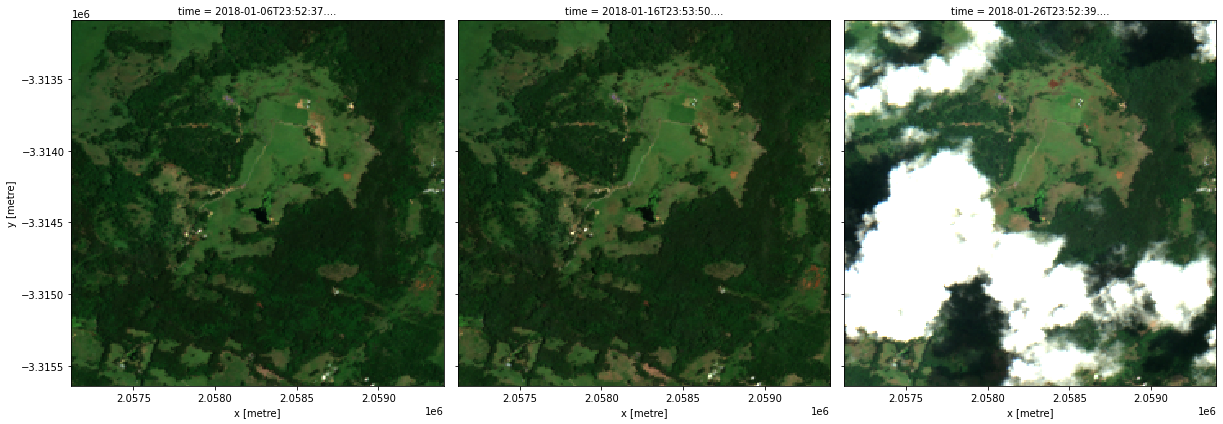

In [9]:
rgb(ds, col='time', vmin=0, vmax=2000)

## Loading cloud-masked Sentinel-2A and 2B with `load_ard`

Another option for loading Sentinel-2 data is the `load_ard()` function, which is a wrapper function around the `dc.load()` function. 
This function will load images from both Sentinel-2A and Sentinel-2B, concatenate and sort the observations by time, and apply a cloud mask (by default `Fmask`; [see instructions below](#s2cloudless-cloud-masking-with-load_ard) to use `s2cloudless` instead). 
The result is an analysis-ready dataset.

You can find more information on this function from the [Using load ard](../How_to_guides/Using_load_ard/) notebook. 

Finding datasets
    ga_s2am_ard_3
    ga_s2bm_ard_3
Applying fmask pixel quality/cloud mask
Loading 7 time steps


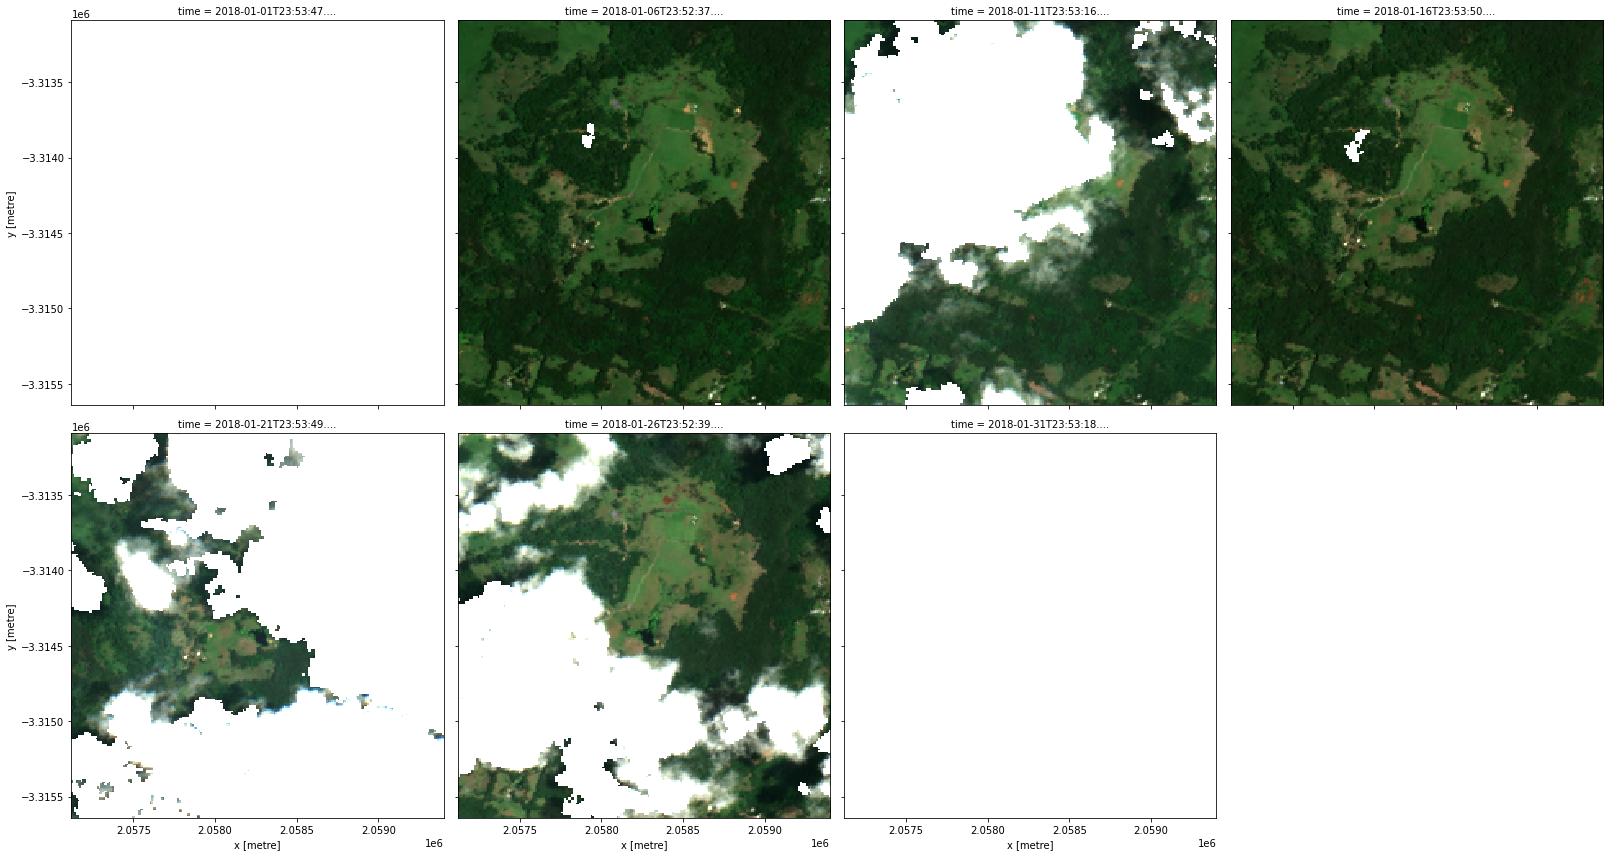

In [10]:
ds_ard = load_ard(dc=dc,
                  products=["ga_s2am_ard_3", "ga_s2bm_ard_3"],
                  measurements=bands,
                  **query)

rgb(ds_ard, col='time', vmin=0, vmax=2000)

## Cloud masking using the `s2cloudless` cloud mask
DEA's Sentinel-2 Surface Reflectance products contain two different cloud masks: the [Function of Mask](https://doi.org/10.1016/j.rse.2014.12.014) (`Fmask`) cloud mask, and [Sinergise's Sentinel Hub cloud detector for Sentinel-2](https://github.com/sentinel-hub/sentinel2-cloud-detector) (`s2cloudless`).

In short, `Fmask` masks cloud pixels based on their physical characteristics such as brightness, temperature and elevation. 
This is a problem for Sentinel-2 as it does not have a thermal infrared sensor unlike Landsat-7, 8 and 9, which can lead to potentially serious false positive cloud classifications over bright features like urban areas or coastlines. 
`s2cloudless` is a single-scene, pixel-based, machine-learning-based cloud detector trained specifically on Sentinel-2 data, so may produce more accurate cloud classifications on Sentinel-2 data.

Key differences between `Fmask` and `s2cloudless` are that additional to clouds, `Fmask` also classifies cloud shadows, snow and water whereas `s2cloudless` only classifies clouds. On the other hand, `s2cloudless` offers a probability layer for clouds whereas the cloud classification from `Fmask` is discrete (a pixel is either cloud or it is not). 

> **Note:** For more information about applying cloud masks using `Fmask`, see the [Masking data](../How_to_guides/Masking_data/) notebook, or the [Cloud masking](DEA_Landsat_Surface_Reflectance.ipynb#Cloud-masking) section of the DEA Landsat Surface Reflectance notebook.

First, let's extract a single Sentinel-2 image to analyse.
By plotting this as a true colour image using `rgb`, we can see it contains cloud:

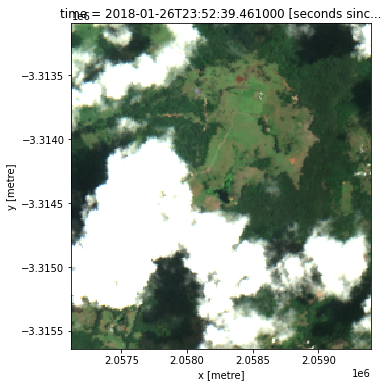

In [11]:
# Define a new dataset at time index = 2
ds_t2 = ds.isel(time=2)

# Plot as an RGB image:
rgb(ds_t2, vmin=0, vmax=2000)

Now let's view the `s2cloudless` probability layer!
In the image below, bright yellow pixels represent a high probability of cloud.

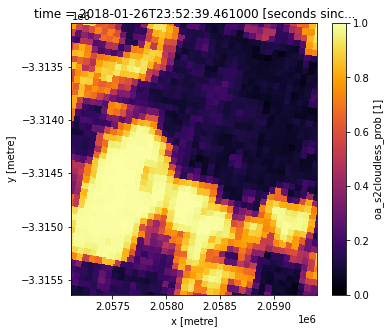

In [12]:
ds_t2.oa_s2cloudless_prob.plot(cmap='inferno', vmin=0, vmax=1.0, aspect=1.1, size=5)

`s2cloudless` uses this cloud probability layer to produce a layer called `oa_s2cloudless_mask` that contains three possible options: nodata, valid (cloud free) pixels, and clouds:

In [13]:
# Display available oa_s2cloudless_mask flags
ds_t2.oa_s2cloudless_mask.flags_definition

{'s2cloudless_mask': {'bits': [0, 1, 2],
  'values': {'0': 'nodata', '1': 'valid', '2': 'cloud'},
  'description': 's2cloudless mask'}}

DEA's `oa_s2cloudless_mask` layer is [calculated using the following steps](https://github.com/sentinel-hub/sentinel2-cloud-detector/blob/a0f8dc7a19e4d5e5a84eee897413f75012966024/s2cloudless/cloud_detector.py#L17-L43):

1. Calculating a moving average of cloud probabilities over a 4 * 60 m pixel window to reduce narrow/small false positives (i.e. ~240 m)
2. Identifying pixels with a cloud probability of greater than 0.4 (i.e. 40% likelihood of being a cloud)
3. Dilating these cloud pixels by 2 pixels to conservatively mask out thin cloud edges (i.e. ~120 m)

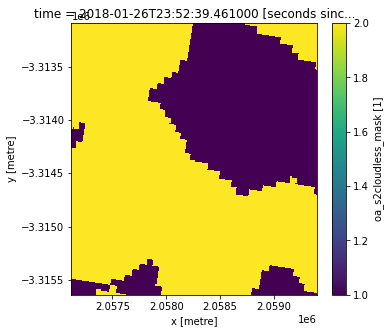

In [14]:
ds_t2.oa_s2cloudless_mask.plot(aspect=1.1, size=5)

We can use this layer to create a simple cloud mask that we can use to remove cloudy pixels from our Sentinel-2 data by setting them to `NaN`:

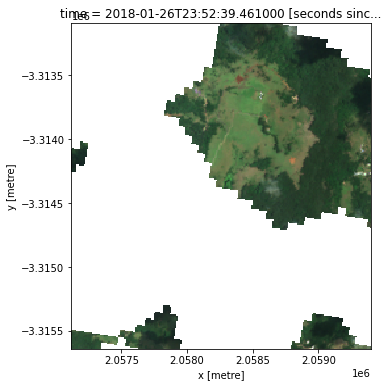

In [15]:
# Identify pixels that are "valid" (i.e. containing no cloud). Remember
# 0 = not valid, 1 = no cloud and 2 = cloud, so alternatively you could
# create the same mask using `ds_t2.oa_s2cloudless_mask == 1`
cloud_free_mask = masking.make_mask(ds_t2.oa_s2cloudless_mask,
                                    s2cloudless_mask="valid")

# Keep only the region where there is no cloud
dst2masked = ds_t2.where(cloud_free_mask)

# Plot the cloud masked data:
rgb(dst2masked, vmin=0, vmax=2000)

But using the `s2cloudless` cloud probability layer, we can also customise our cloud masking!
For example, we could choose to keep only pixels that have less than a 90% probability of being cloud:

In [16]:
# Keep only the pixels where the probabability of cloud is below 90%
dst2probmasked = ds_t2.where(ds_t2.oa_s2cloudless_prob < 0.9)

Next, let's view the original image, the image after using `oa_s2cloudless_mask`, and the image after keeping only pixels where `oa_s2cloudless_prob < 0.9` respectively:

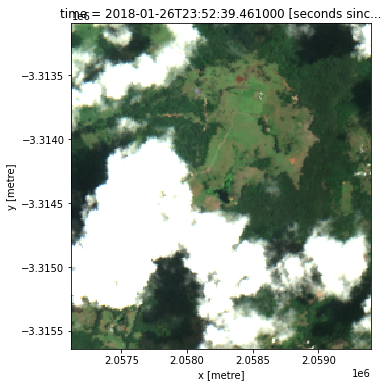

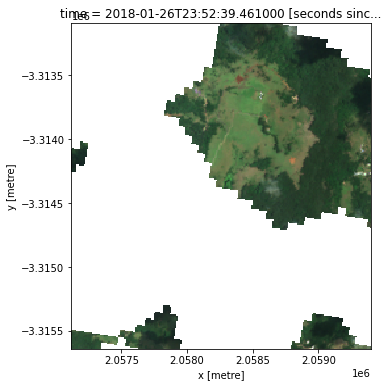

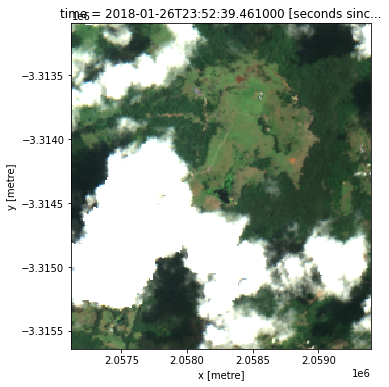

In [17]:
rgb(ds_t2, vmin=0, vmax=2000)
rgb(dst2masked, vmin=0, vmax=2000)
rgb(dst2probmasked, vmin=0, vmax=2000)

We can see that the last image is difficult to interpret because the masking of `NaNs` looks like whiter clouds! To work around this, we can manually set the nan pixels to 0 so they appear black.

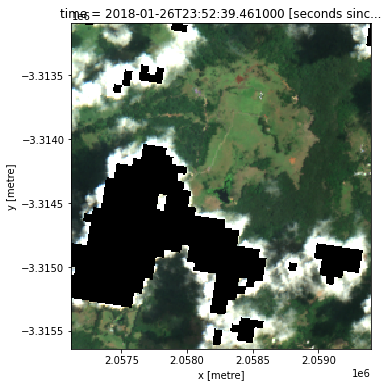

In [18]:
# Manually set the nan regions equal to zero so they don't appear white like clouds!
dst2probmaskedzero = dst2probmasked.where(~dst2probmasked.isnull(), 0)

rgb(dst2probmaskedzero, vmin=0, vmax=2000)

Much better!

### `s2cloudless` cloud masking with `load_ard`

We can also automatically apply a cloud mask from `s2cloudless` using the `load_ard` function introduced above.
To do this, provide `cloud_mask="s2cloudless"` and `mask_pixel_quality=True`:

Finding datasets
    ga_s2am_ard_3
    ga_s2bm_ard_3
Applying s2cloudless pixel quality/cloud mask
Loading 7 time steps


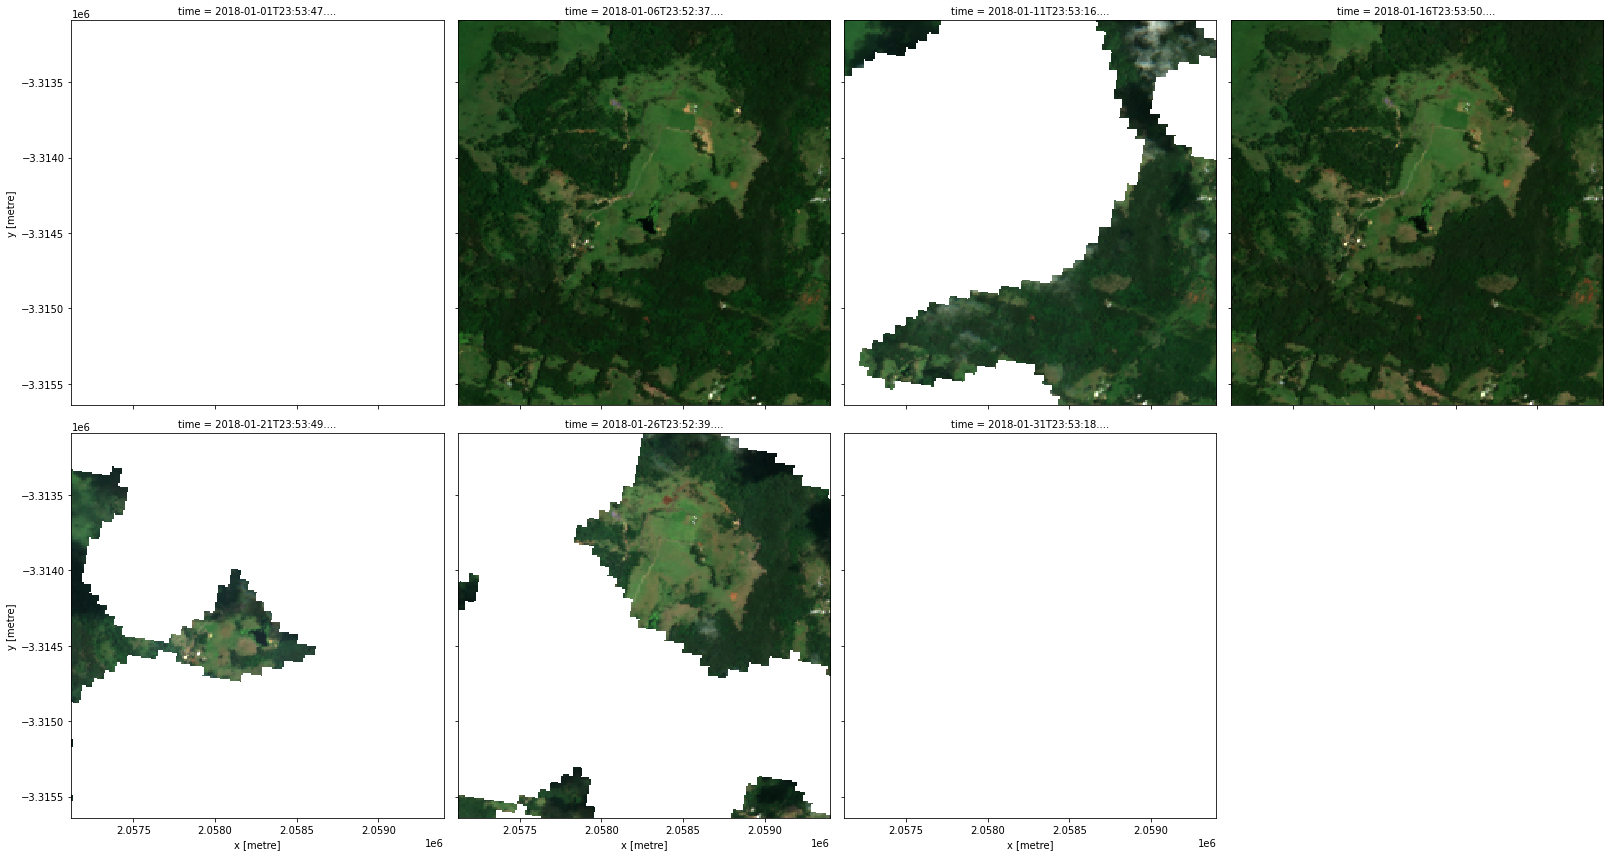

In [19]:
ds = load_ard(dc=dc,
              products=["ga_s2am_ard_3", "ga_s2bm_ard_3"],
              measurements=bands,
              cloud_mask="s2cloudless",
              mask_pixel_quality=True,
              **query)

rgb(ds, col='time', vmin=0, vmax=2000)

### Dropping cloudy scenes
When [plotting the observations](#Plotting-Sentinel-2-surface-reflectance), we can see that some observations are mostly obscured by cloud, leaving very little usable data. 
To ensure that this does not lead to unrepresentative statistics, we can keep only observations that had (for example) less than 25% cloudy pixels.

In [20]:
# Make a new dataset where the value is True where there is cloud and False everywhere else.
# Then take the spatial mean to end up with a cloud percentage for each time index
percent_cloud = (ds.oa_s2cloudless_mask == 2).mean(dim=['x', 'y'])

# Select the observations with a cloud cover percentage less than 25%
ds_noncloudy = ds.sel(time=percent_cloud < 0.25)

If we plot our filtered dataset, we can see that cloudy scenes have now been dropped and we are left with only clear satellite images:

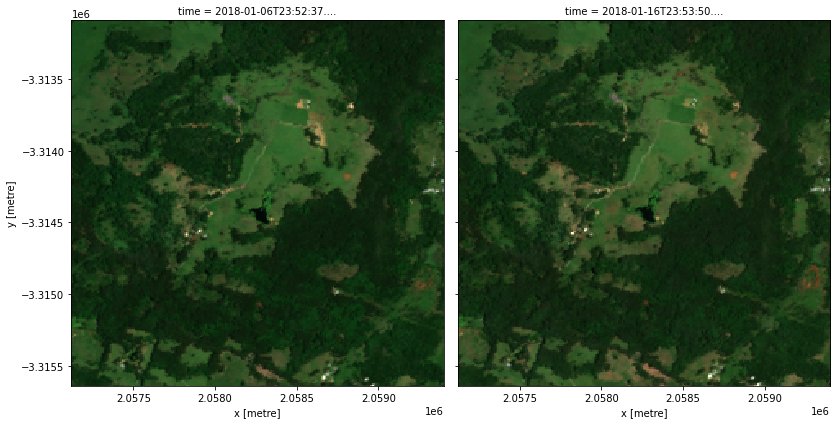

In [21]:
# Plot the observations after dropping cloudy scenes
rgb(ds_noncloudy, col='time', vmin=0, vmax=2000)

### Dropping cloudy scenes using `load_ard`
We can also use `load_ard` to drop cloudy scenes from our data. 
To do this we can use the `min_gooddata` parameter.
This works the opposite way to the example above by counting the percent of good quality (e.g. non-cloudy pixels) in each image; to keep images with less than 25% cloud, we can specify `min_gooddata=0.75`:

Finding datasets
    ga_s2am_ard_3
    ga_s2bm_ard_3
Counting good quality pixels for each time step using s2cloudless
Filtering to 2 out of 7 time steps with at least 75.0% good quality pixels
Loading 2 time steps


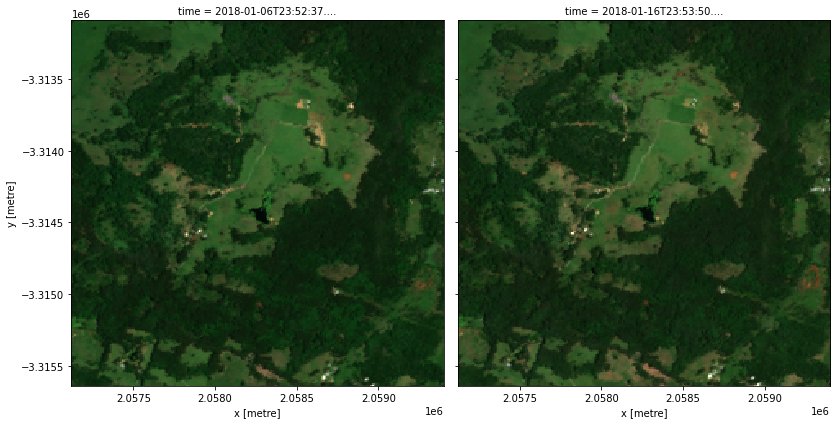

In [22]:
ds_noncloudy = load_ard(dc=dc,
                        products=["ga_s2am_ard_3", "ga_s2bm_ard_3"],
                        measurements=bands,
                        cloud_mask='s2cloudless',
                        mask_pixel_quality=False,
                        min_gooddata=0.75,
                        **query)

rgb(ds_noncloudy, col='time', vmin=0, vmax=2000)

## Advanced

### Filtering by metadata to remove poorly georeferenced scenes
DEA Sentinel-2 Surface Reflectance data contains a set of extra metadata fields that can be queried to filter data before it is loaded.
Searchable metadata fields for a product can be listed using the code below:

In [23]:
dataset = dc.find_datasets(product='ga_s2am_ard_3', limit=1)[0]
dir(dataset.metadata)

['cloud_cover',
 'creation_dt',
 'creation_time',
 'crs_raw',
 'dataset_maturity',
 'eo_gsd',
 'eo_sun_azimuth',
 'eo_sun_elevation',
 'fmask_clear',
 'fmask_cloud_shadow',
 'fmask_snow',
 'fmask_water',
 'format',
 'gqa_abs_iterative_mean_x',
 'gqa_abs_iterative_mean_xy',
 'gqa_abs_iterative_mean_y',
 'gqa_abs_x',
 'gqa_abs_xy',
 'gqa_abs_y',
 'gqa_cep90',
 'gqa_iterative_mean_x',
 'gqa_iterative_mean_xy',
 'gqa_iterative_mean_y',
 'gqa_iterative_stddev_x',
 'gqa_iterative_stddev_xy',
 'gqa_iterative_stddev_y',
 'gqa_mean_x',
 'gqa_mean_xy',
 'gqa_mean_y',
 'gqa_stddev_x',
 'gqa_stddev_xy',
 'gqa_stddev_y',
 'grid_spatial',
 'id',
 'instrument',
 'label',
 'lat',
 'lon',
 'measurements',
 'platform',
 'product_family',
 'region_code',
 's2cloudless_clear',
 's2cloudless_cloud',
 'sentinel_datastrip_id',
 'sentinel_product_name',
 'sentinel_tile_id',
 'sources',
 'time']

Metadata fields with the prefix `gqa_*` represent **Geometric Quality Assessment** metrics, and are particularly useful because Sentinel-2 data has comparatively poor georeferencing (particularly between 2015 and 2017). 
One of the most useful metadata fields is:

* `gqa_iterative_mean_xy`: An estimate of how accurately a satellite scene is georeferenced, calculated by comparing hundreds of candidate Ground Control Points, then discarding outliers to obtain a more robust estimate.
Values are in pixel units based on [a 25 metre resolution reference image](https://docs.dea.ga.gov.au/data/product/australian-geographic-reference-image) (i.e. 0.2 = 5 metres)

This parameter can be used to ensure that we only load data that is closely aligned spatially through time. 
For example, to load only imagery with a geometric accuracy of less than 12.5 m (e.g. 50% of the 25 m reference pixel), we can add `gqa_iterative_mean_xy=(0, 0.5)` to our `dc.load` query:

In [24]:
ds_geo = dc.load(
    product="ga_s2am_ard_3",
    measurements=["nbart_red"],
    x=(149.10, 149.12),
    y=(-35.29, -35.31),
    time=("2017-09", "2017-10"),
    gqa_iterative_mean_xy=(0, 0.5),
    output_crs="EPSG:3577",
    resolution=(-10, 10),
    group_by="solar_day",
)


> **Note**: If you receive no results when filtering by `gqa_*` metadata, it may be because these fields had a value of `NaN` due to no ground control points (GCPs) being available for the location.

***

## Additional information

**License:** The code in this notebook is licensed under the [Apache License, Version 2.0](https://www.apache.org/licenses/LICENSE-2.0). 
Digital Earth Australia data is licensed under the [Creative Commons by Attribution 4.0](https://creativecommons.org/licenses/by/4.0/) license.

**Contact:** If you need assistance, please post a question on the [Open Data Cube Slack channel](http://slack.opendatacube.org/) or on the [GIS Stack Exchange](https://gis.stackexchange.com/questions/ask?tags=open-data-cube) using the `open-data-cube` tag (you can view previously asked questions [here](https://gis.stackexchange.com/questions/tagged/open-data-cube)).
If you would like to report an issue with this notebook, you can file one on [GitHub](https://github.com/GeoscienceAustralia/dea-notebooks).

**Created:** February 2023

**Last modified:** February 2023

**Compatible datacube version:** 

In [25]:
print(datacube.__version__)

1.8.6


## Tags
<!-- Browse all available tags on the DEA User Guide's [Tags Index](https://docs.dea.ga.gov.au/genindex/) -->